### Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# for warning
from warnings import filterwarnings
filterwarnings("ignore")  ## To remove any kind of warning

### Reading the dataset

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Checking the unique values for each column
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
#Statistical measures
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Checking the missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Checking the distributions of Target variable
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Exploratory Data Analysis

### Gender Exploration

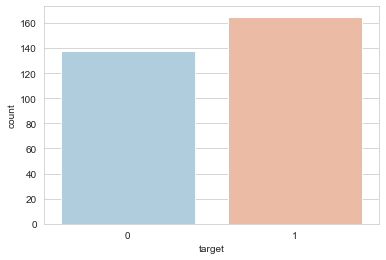

In [10]:
sns.set_style("whitegrid")
sns.countplot(x='target',data=data,palette='RdBu_r')

### Chest Pain Type Exploration 

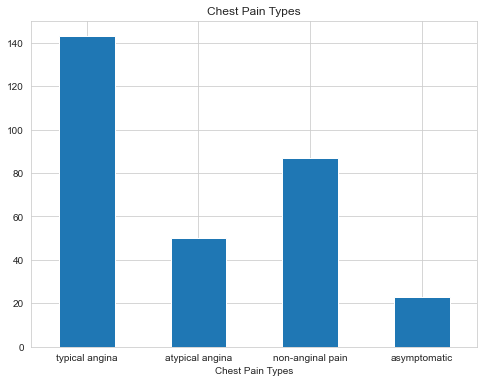

In [11]:
# Display chest pain types in bar chart
data.groupby(data['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

We can see that most of the people with heart disease have asymptomatic chest pain.

### Fasting Blood Sugar Exploration

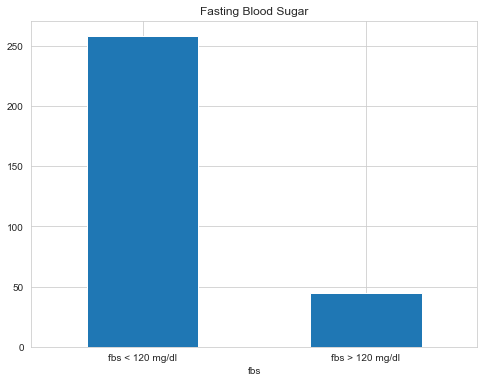

In [12]:
# Display fasting blood sugar in bar chart
data.groupby(data['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

### Electrocardiographic Results Exploration

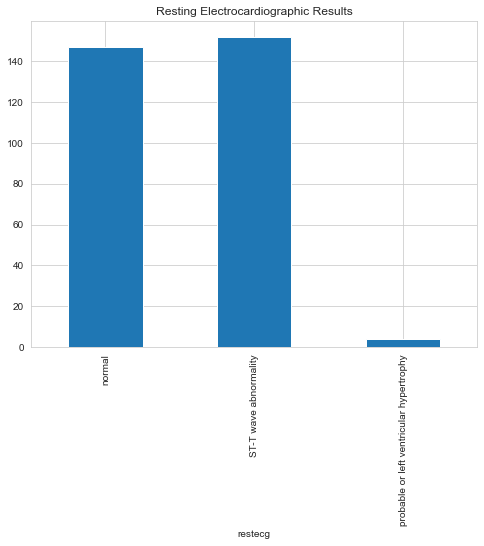

In [13]:
# Display electrocardiographic results in bar chart
data.groupby(data['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have ST-T wave abnormality.

### Exercise Induced Angina Exploration

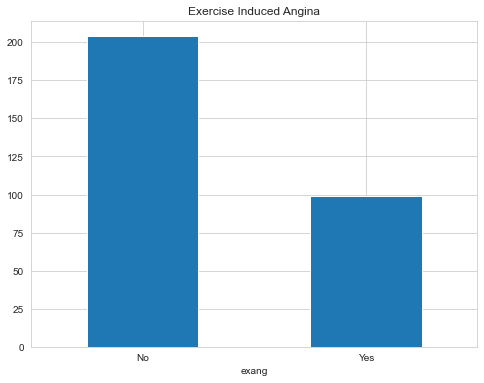

In [14]:
# Display exercise induced angina in bar chart
data.groupby(data['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease

### Slope Exploration

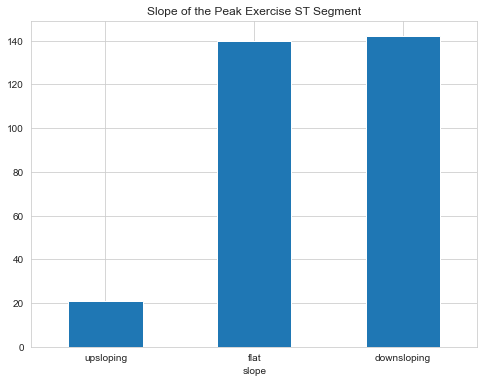

In [15]:
# Display slope of the peak exercise ST segment in bar chart
data.groupby(data['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have downsloping peak ST segment.

### Major Vessels Exploration

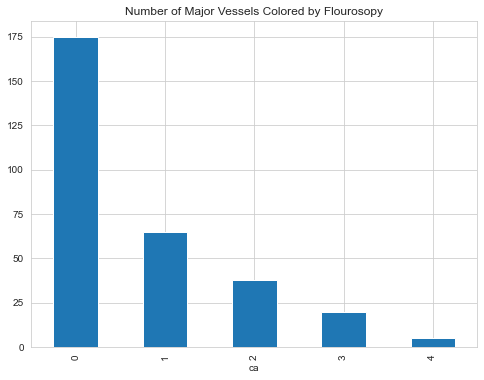

In [16]:
# Display number of major vessels in bar chart
data.groupby(data['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', figsize = (8, 6))
plt.show()

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.

### Correlation matrix

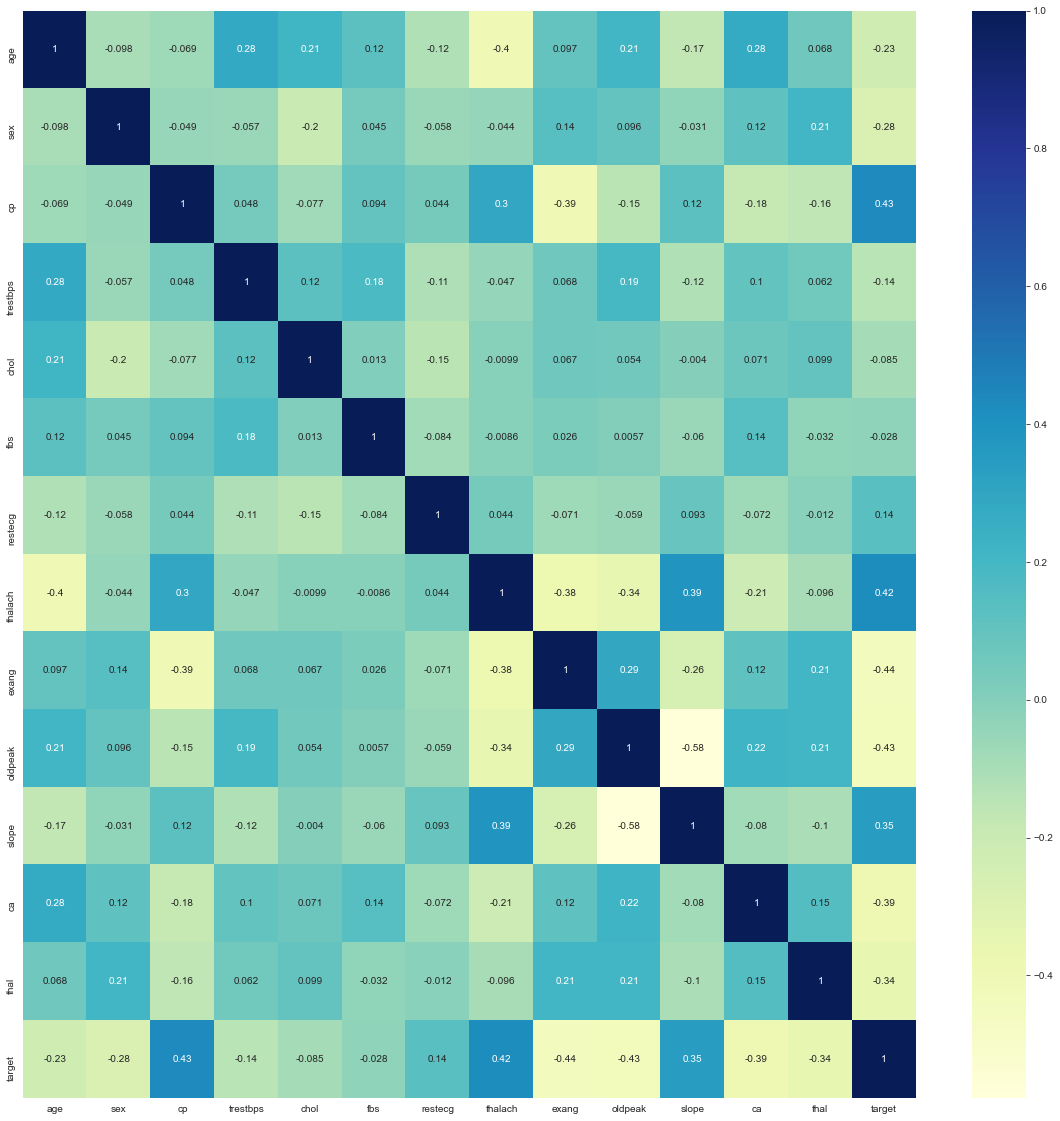

In [17]:
corr = data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="YlGnBu")

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced 
by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels 
(0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly.
We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

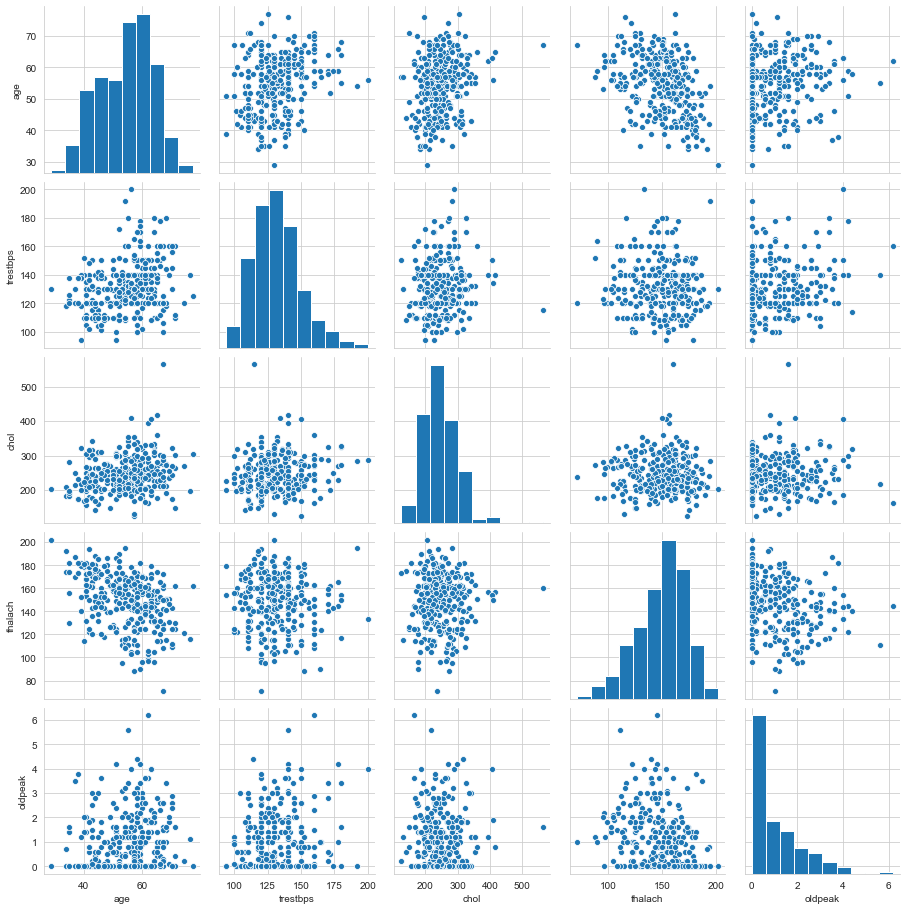

In [18]:
## Pairplotting of dataframe
import seaborn as sns
numeric_data = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(numeric_data)

### PREPARE DATA FOR MODELLING

In [19]:
X = data.drop(['target'],axis = 1)
y = data['target']

In [20]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

###  LOGISTIC REGRESSION

In [21]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model1 = LogisticRegression() # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred1)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61

[[26  6]
 [ 0 29]]


                           Accuracy 90%

### Save Model

In [25]:
pickle.dump(model1, open('model.pkl','wb'))

In [26]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))